In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [3]:
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [22]:
train_images.shape

(60000, 28, 28)

In [26]:
print(train_images[1].shape)
print("  ")
print(train_images[1])


(28, 28)
  
[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        

In [5]:
class_names = ['T-Shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']
#defined by tenserflow

In [29]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

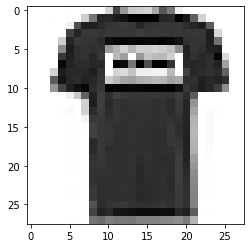

In [30]:
plt.imshow(train_images[1],cmap=plt.cm.binary)
plt.show()

In [8]:
#normalizing to range 0-1
train_images = train_images/255.0
test_images = test_images/255.0

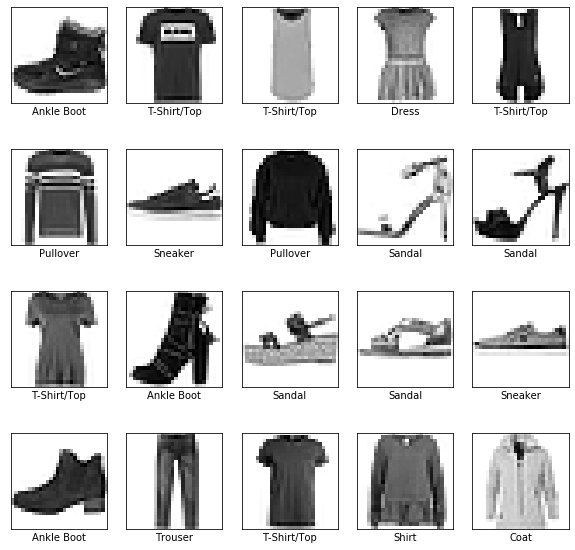

In [35]:
plt.figure(figsize=(10,10))
for i in range(20):
  plt.subplot(4,5,i+1) #subplot to divide into sub part with x rows then y columns and i to increase value of var i by 1 
  plt.grid(False)    #not needed
  plt.xticks([])     #to remove indexing on x and y axises respectively
  plt.yticks([])
  plt.imshow(train_images[i],cmap=plt.cm.binary) 
  plt.xlabel(class_names[train_labels[i]])    
plt.show()

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())      #input
model.add(tf.keras.layers.Dense(784,activation='relu'))       #hidden
model.add(tf.keras.layers.Dense(600,activation='relu'))       #hidden
model.add(tf.keras.layers.Dense(64,activation='relu'))       #hidden
model.add(tf.keras.layers.Dense(10,activation='softmax'))       #output

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 15s 247us/sample - loss: 0.4749 - accuracy: 0.8270
Epoch 2/5
60000/60000 [==============================] - 14s 237us/sample - loss: 0.3609 - accuracy: 0.8675
Epoch 3/5
60000/60000 [==============================] - 14s 236us/sample - loss: 0.3275 - accuracy: 0.8792
Epoch 4/5
60000/60000 [==============================] - 15s 242us/sample - loss: 0.3029 - accuracy: 0.8868
Epoch 5/5
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2829 - accuracy: 0.8946


In [13]:
test_loss,test_accu = model.evaluate(test_images,test_labels)
print(test_loss,test_accu)
#aplying on test dataset to get accuracy

10000/10000 [==============================] - 1s 81us/sample - loss: 0.3417 - accuracy: 0.8769
0.34167513777017594 0.8769


In [14]:
predictions = model.predict(test_images)

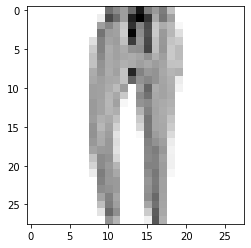

In [43]:
plt.imshow(test_images[80],cmap=plt.cm.binary)
plt.show()

In [44]:
np.argmax(predictions[80])

1

In [46]:
test_labels[80]

1

In [45]:
x=test_labels[80]
print(class_names[x])

Trouser
